### Clustering

### DBSCAN, HDBSCAN

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
data = pd.DataFrame(X)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
std_slc = StandardScaler()
X_std = std_slc.fit_transform(X)

In [4]:
clt = DBSCAN()

model = clt.fit(X_std)

clusters = pd.DataFrame(model.fit_predict(X_std))
data["Cluster"] = clusters

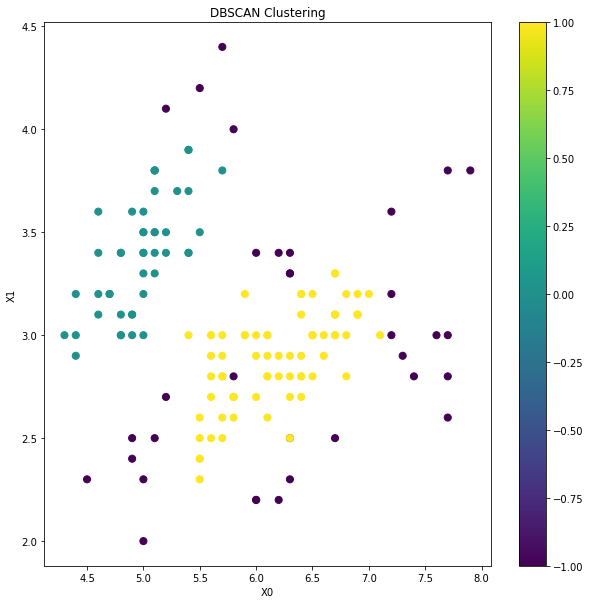

In [5]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(data[0],data[1], c=data["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

## HDBSCAN

https://github.com/scikit-learn-contrib/hdbscan

In [6]:
import hdbscan
from sklearn.datasets import make_blobs

data, _ = make_blobs(1000)
data

array([[ 6.14307123, -8.34347038],
       [-3.42276144,  1.64354669],
       [-4.76433649,  2.07411452],
       ...,
       [ 4.31335068, -8.17188919],
       [ 4.5595437 , -8.3542768 ],
       [-4.30461157,  3.29719251]])

In [7]:
clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
cluster_labels = clusterer.fit_predict(data)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)

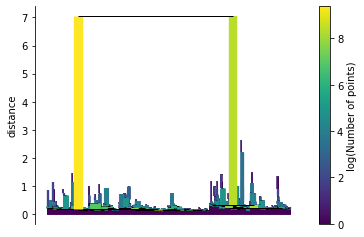

In [8]:
_ = hierarchy.plot()